In [1]:
install.packages("NMF")


The downloaded binary packages are in
	/var/folders/xp/m16lgcdj3c3_c4y7xpgrt_n80000gn/T//RtmpMUVfNh/downloaded_packages


In [2]:
library(CellChat)
library(Seurat)
library(NMF)
library(ggalluvial)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 4.4.1"

Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Loading required package: ggplot2

Warning message:
"package 'Seurat' was built under R version 4.4.1"
Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The f

In [3]:
seurat_obj <- readRDS("../clustering/out/integrated_seurat_clusters_0.2.rds")

In [4]:
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,diagnosis,age,sex,tissue_location,RNA_snn_res.0.1,seurat_clusters,pANN_1,...,RNA_snn_res.0.05,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.4,RNA_snn_res.0.5,RNA_snn_res.0.6,RNA_snn_res.0.7,RNA_snn_res.0.8,RNA_snn_res.0.9,RNA_snn_res.0.99
,<chr>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<fct>,<fct>,<dbl>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
SCPCS000002_doubletfinder.rds_TCTTGCGCAAGCTACT,SCPCS000002,37293,6072,Glioblastoma,7,F,Right thalamus,3,5,0.4285714,...,3,4,4,5,4,4,5,7,6,5
SCPCS000002_doubletfinder.rds_AAGACTCAGCACTCCG,SCPCS000002,36546,5588,Glioblastoma,7,F,Right thalamus,2,3,0.2857143,...,2,2,2,2,3,2,1,2,2,3
SCPCS000002_doubletfinder.rds_GGAATCTTCCTAACAG,SCPCS000002,38553,5642,Glioblastoma,7,F,Right thalamus,2,3,0.3809524,...,2,2,2,2,3,2,1,2,2,3
SCPCS000002_doubletfinder.rds_TGACAGTGTCTCAGAT,SCPCS000002,38019,6575,Glioblastoma,7,F,Right thalamus,3,5,0.5714286,...,3,4,4,5,4,4,5,7,6,5
SCPCS000002_doubletfinder.rds_TATTGGGAGCCATATC,SCPCS000002,42958,6942,Glioblastoma,7,F,Right thalamus,7,26,0.3333333,...,6,10,13,15,17,19,19,19,19,26
SCPCS000002_doubletfinder.rds_GACACGCCAAACGAGC,SCPCS000002,38022,7026,Glioblastoma,7,F,Right thalamus,0,16,0.2857143,...,0,1,0,14,15,17,16,16,16,16


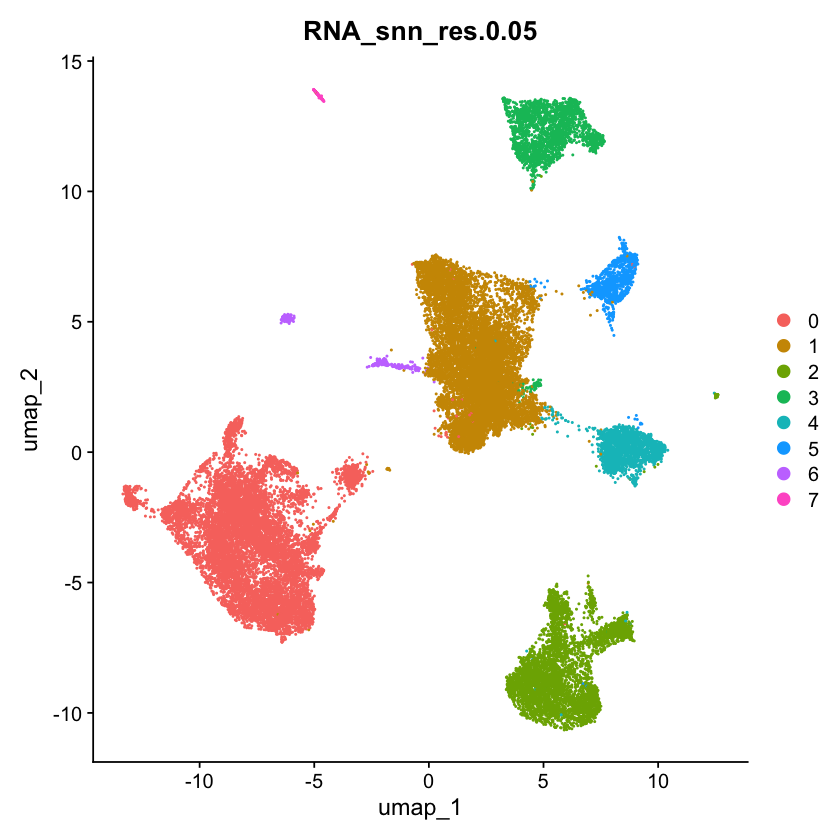

In [5]:
DimPlot(seurat_obj, group.by="RNA_snn_res.0.05")

In [6]:
seurat_obj@meta.data$label <- paste0("C", seurat_obj@meta.data$RNA_snn_res.0.05)
meta <- seurat_obj@meta.data
meta$samples <- as.factor(meta$orig.ident)

In [7]:
cellchat <- createCellChat(object=seurat_obj, meta=meta, group.by="label")
cellchat <- addMeta(cellchat, meta=meta)
cellchat <- setIdent(cellchat, ident.use="label")
groupSize <- as.numeric(table(cellchat@idents))

[1] "Create a CellChat object from a Seurat object"
The `data` slot in the default assay is used. The default assay is RNA 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  C0, C1, C2, C3, C4, C5, C6, C7 


In [8]:
CellChatDB <- CellChatDB.human
CellChatDB.use <- subsetDB(CellChatDB, search="Secreted Signaling")
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

The number of highly variable ligand-receptor pairs used for signaling inference is 965 


In [9]:
cellchat <- computeCommunProb(cellchat)
cellchat <- filterCommunication(cellchat, min.cells = 10)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-02-16 21:48:04.67522]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-02-16 21:50:29.230523]"


In [10]:
df.net <- subsetCommunication(cellchat)

In [11]:
slot.name = "netP"
df.net <- subsetCommunication(cellchat, sources.use=c(0,1), targets.use=c(16))

Warning message in subsetCommunication_internal(net, LR, cells.level, slot.name = slot.name, :
"No significant signaling interactions are inferred!"


In [12]:
cellchat <- computeCommunProbPathway(cellchat)

In [13]:
cellchat <- aggregateNet(cellchat)

In [14]:
mat <- cellchat@net$weight

In [15]:
pathway_list <- cellchat@netP$pathways
pathway_list

[1] "PTN"        "MIF"        "SPP1"       "CypA"       "MK"        
 [6] "COMPLEMENT" "GALECTIN"   "PDGF"       "NRG"        "GRN"       
[11] "PTPR"       "PARs"       "TGFb"       "BMP"        "ANNEXIN"   
[16] "SLIT"       "GAS"        "BAFF"       "WNT"        "GDF"       
[21] "ncWNT"

Do heatmap based on a single object 




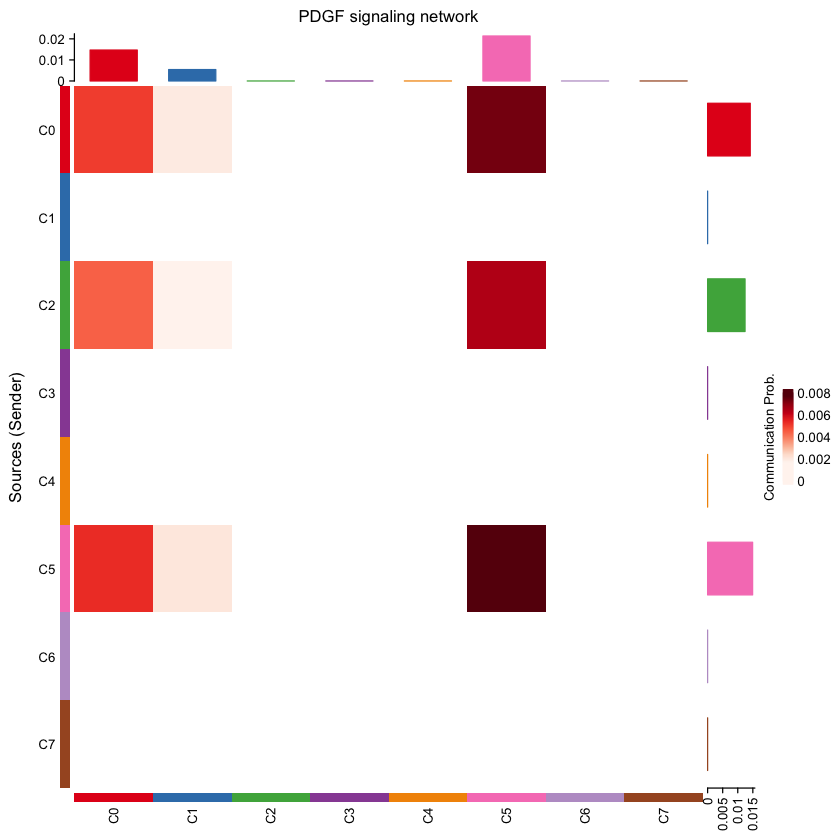

In [16]:
pathways.show <- c("PDGF")
netVisual_heatmap(cellchat, signaling=pathways.show)

In [17]:

cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

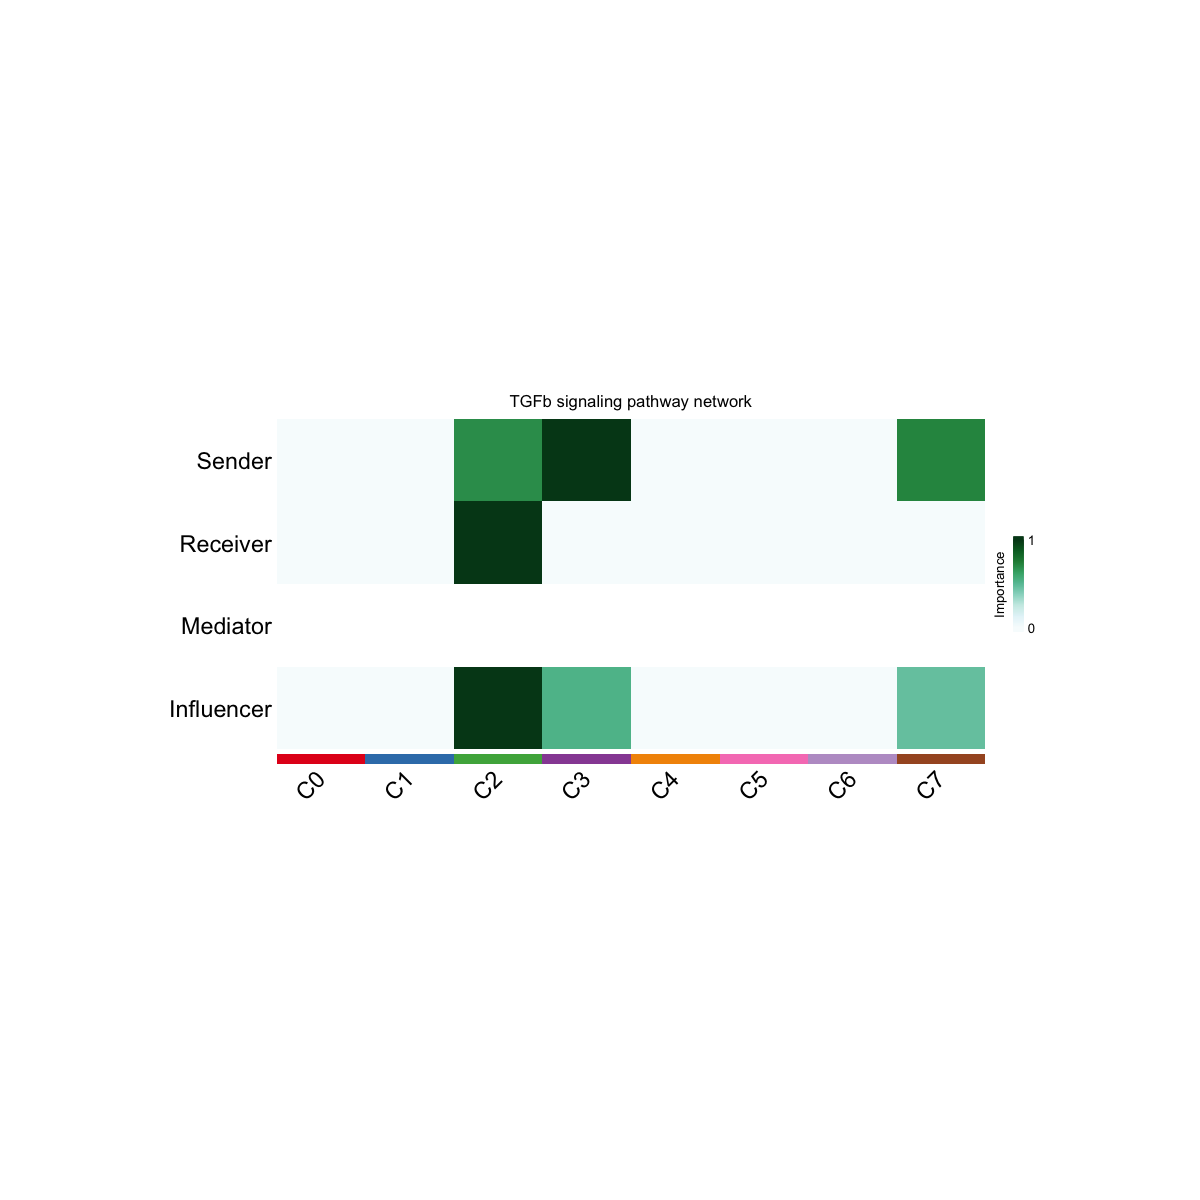

In [18]:
options(repr.plot.width=10, repr.plot.height=10)
netAnalysis_signalingRole_network(
  cellchat,
  signaling = c("TGFb"),
  width = 15,
  height = 7,
  font.size = 14
)

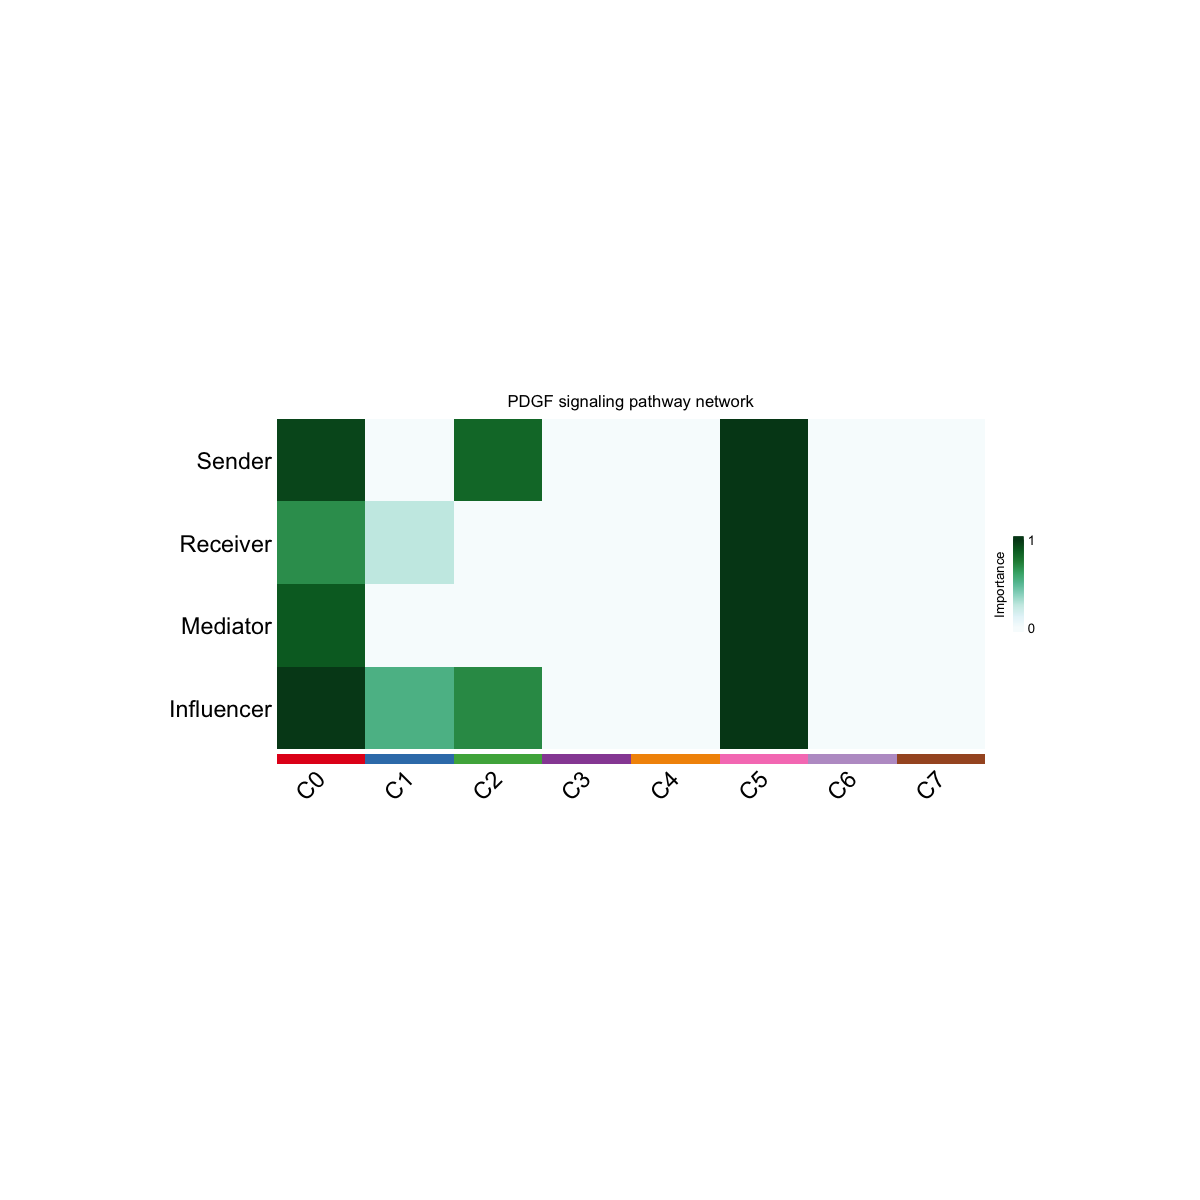

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
netAnalysis_signalingRole_network(
  cellchat,
  signaling = c("PDGF"),
  width = 15,
  height = 7,
  font.size = 14
)

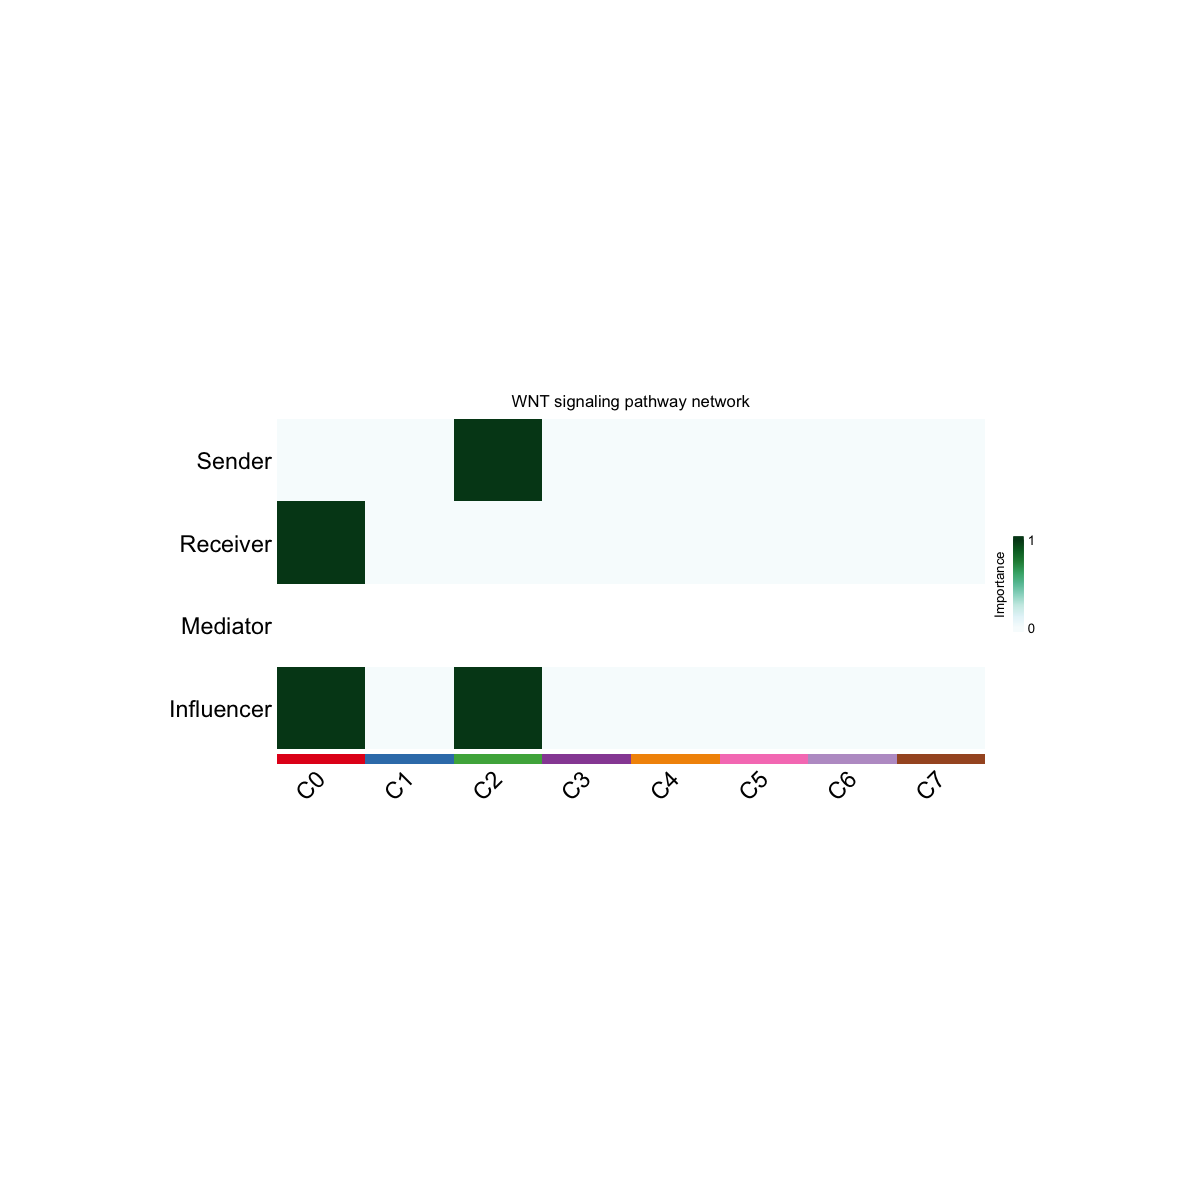

In [20]:
options(repr.plot.width=10, repr.plot.height=10)
netAnalysis_signalingRole_network(
  cellchat,
  signaling = c("WNT"),
  width = 15,
  height = 7,
  font.size = 14
)

In [21]:
ht1 <- netAnalysis_signalingRole_heatmap(cellchat, 
                                        width = 15,
                                        height = 12,
                                        font.size = 14,
                                        pattern = "outgoing")
ht2 <- netAnalysis_signalingRole_heatmap(cellchat, 
                                        width = 15,
                                        height = 12,
                                        font.size = 14,
                                        pattern = "incoming")

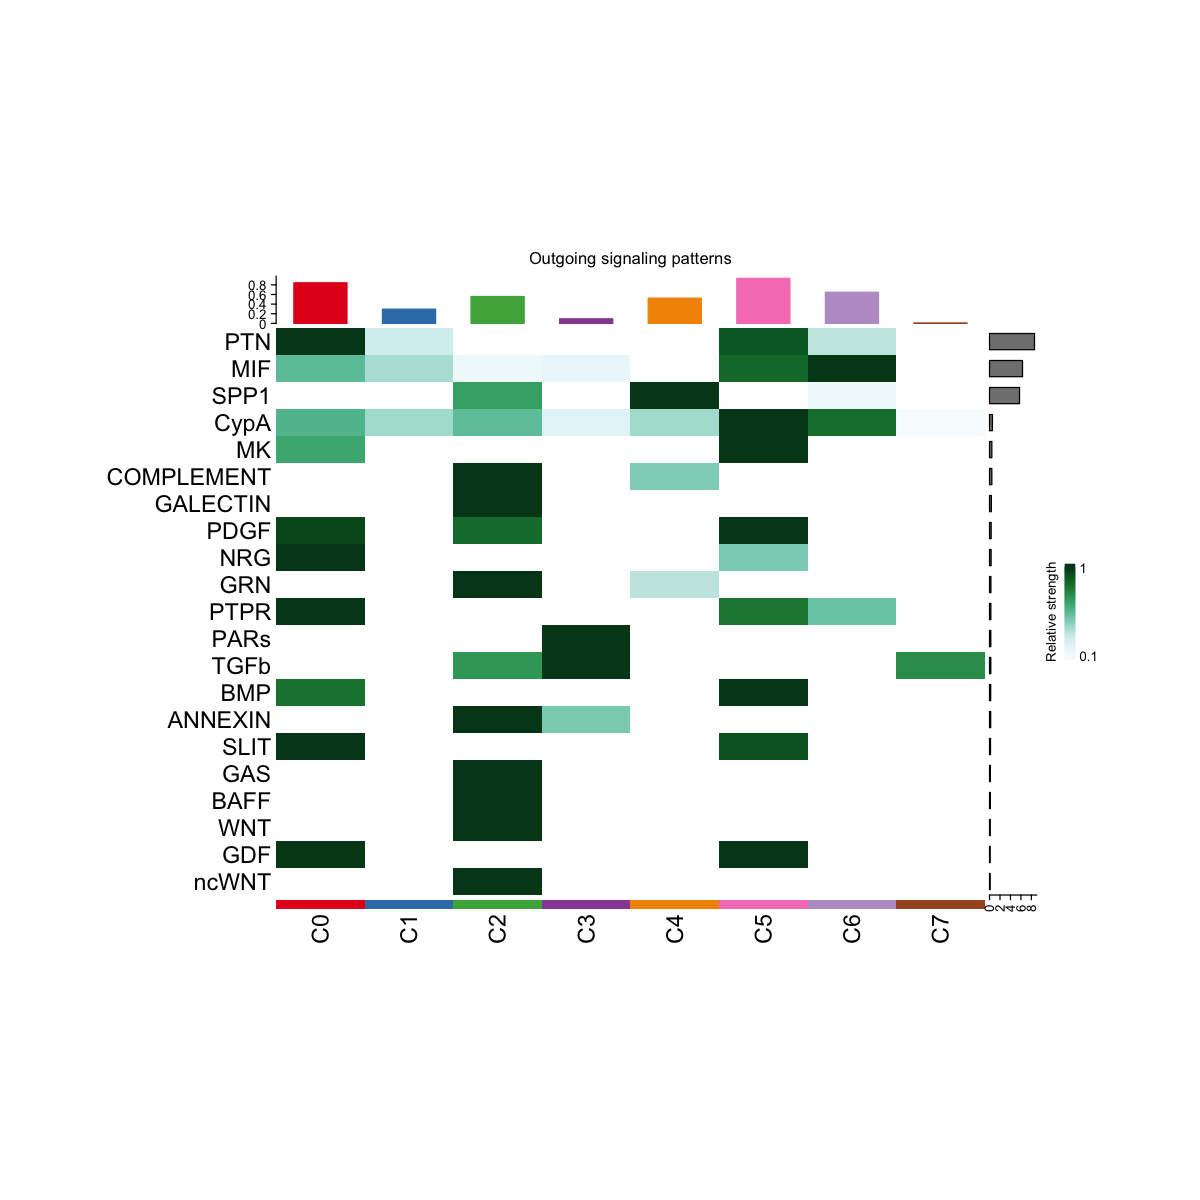

In [22]:
ht1

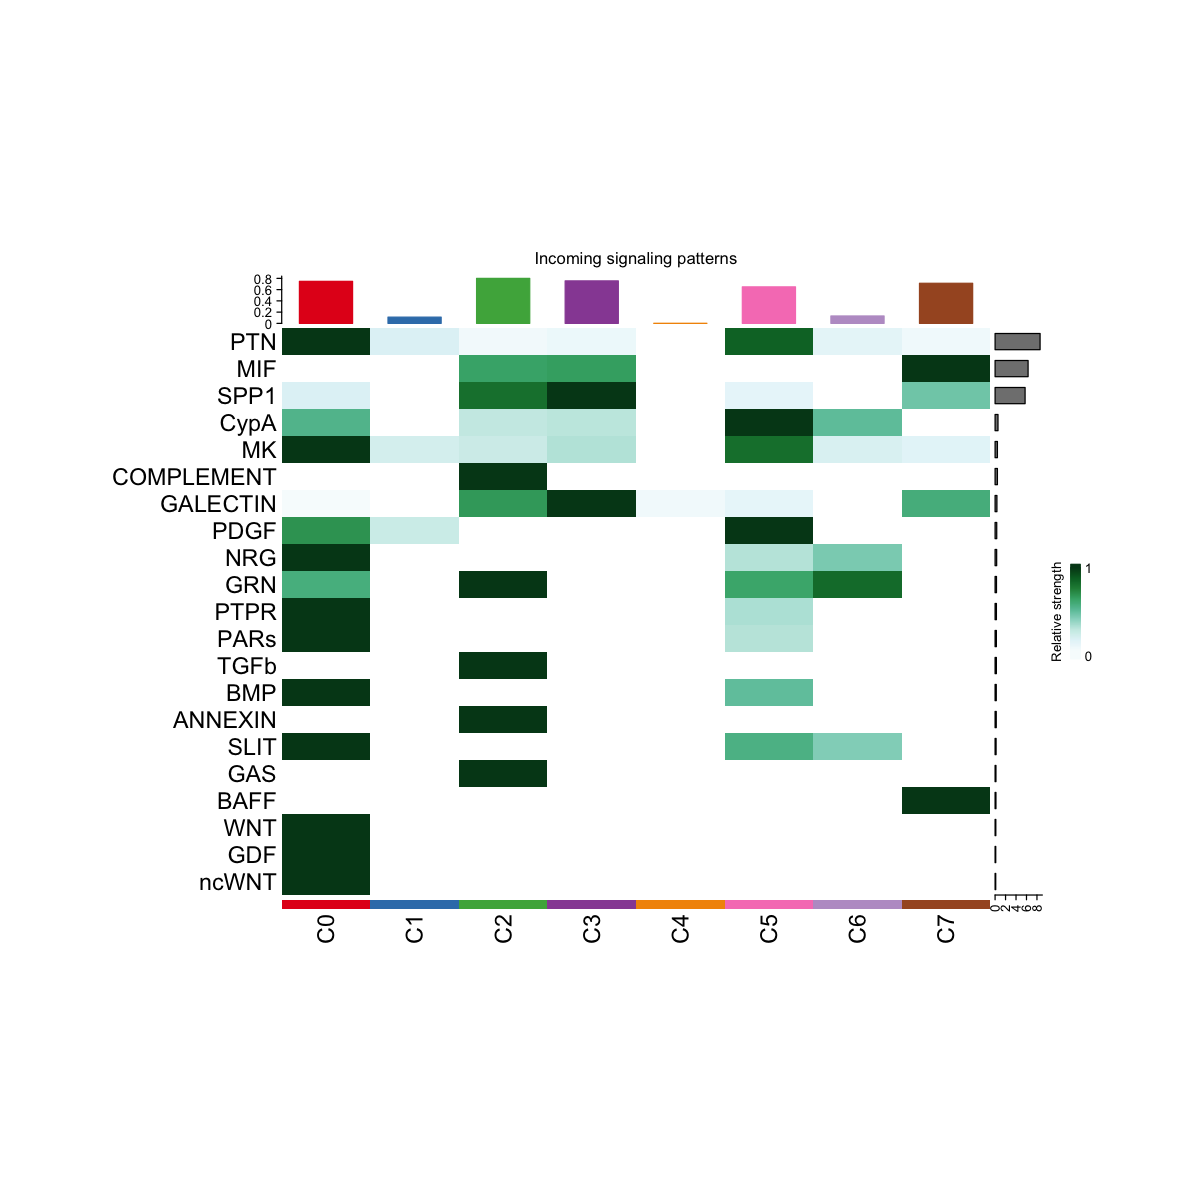

In [23]:
ht2

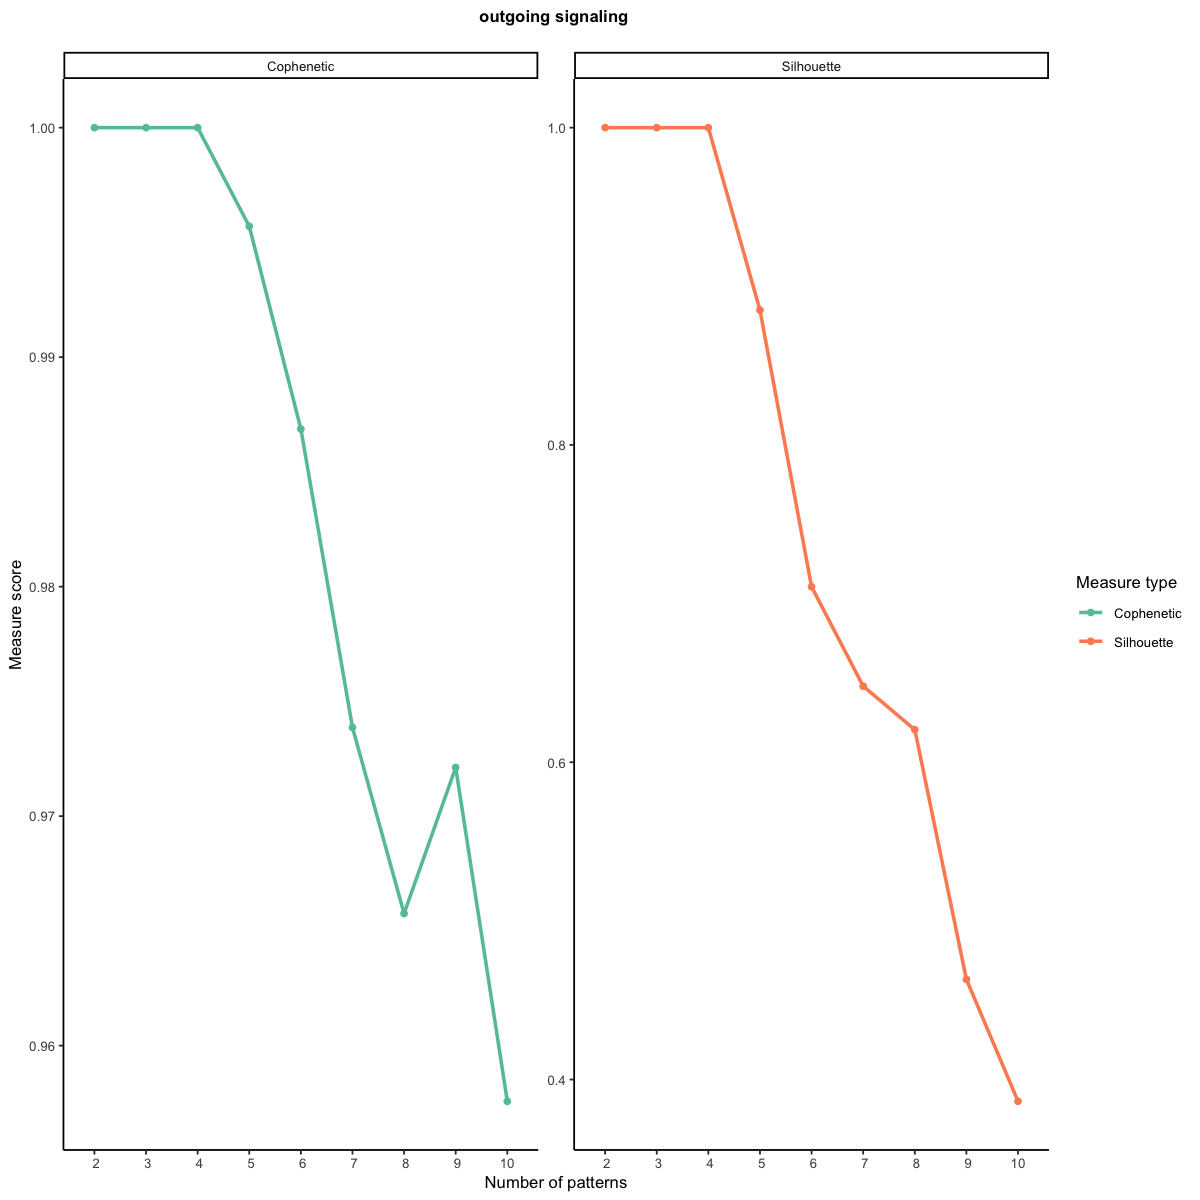

In [25]:
selectK(cellchat, pattern = "outgoing")

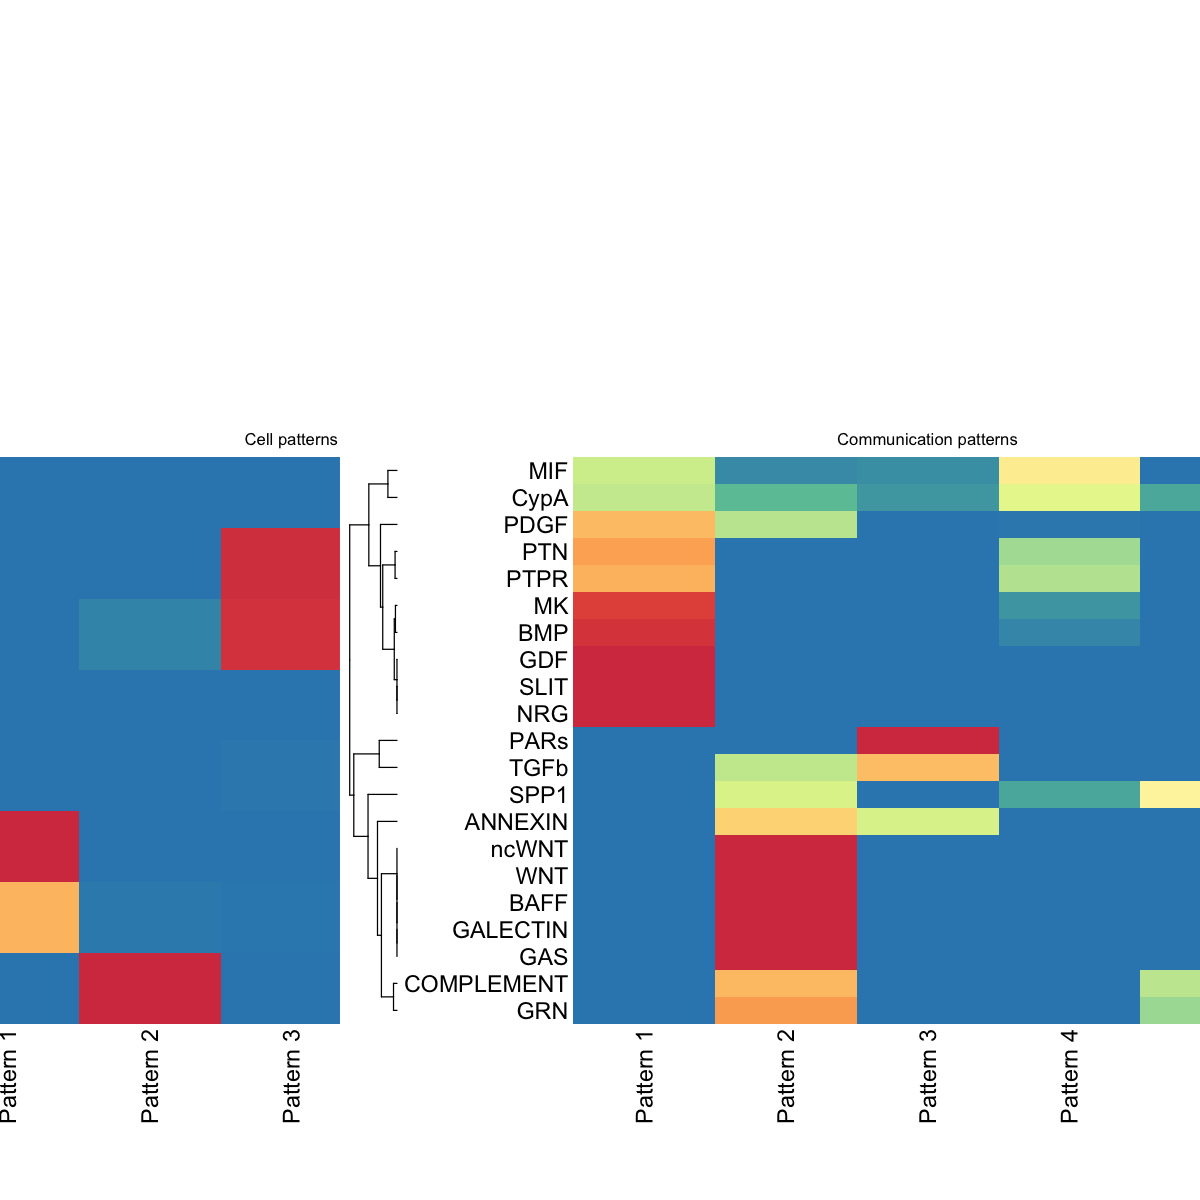

In [26]:
options(repr.plot.wdith=20, repr.plot.height=10)
nPatterns <- 5
cellchat <- identifyCommunicationPatterns(
  cellchat,
  width=15,
  height=12,
  font.size = 14,
  pattern = "outgoing",
  k = nPatterns
)

In [27]:
library(ggalluvial)

Please make sure you have load `library(ggalluvial)` when running this function



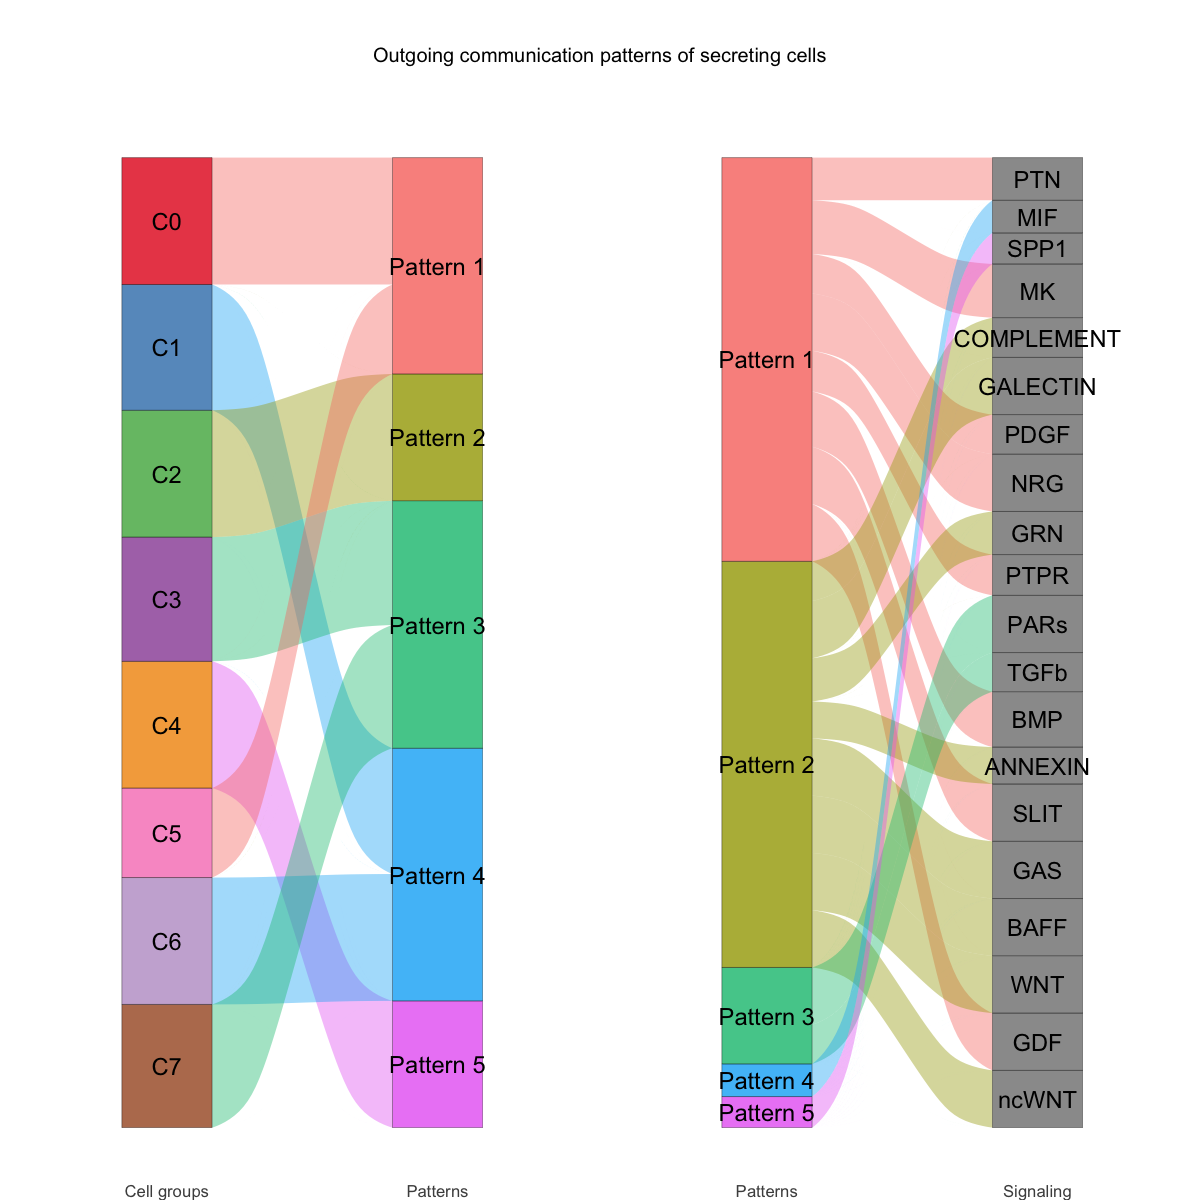

In [28]:

netAnalysis_river(cellchat, 
                pattern = "outgoing",
                font.size = 5)

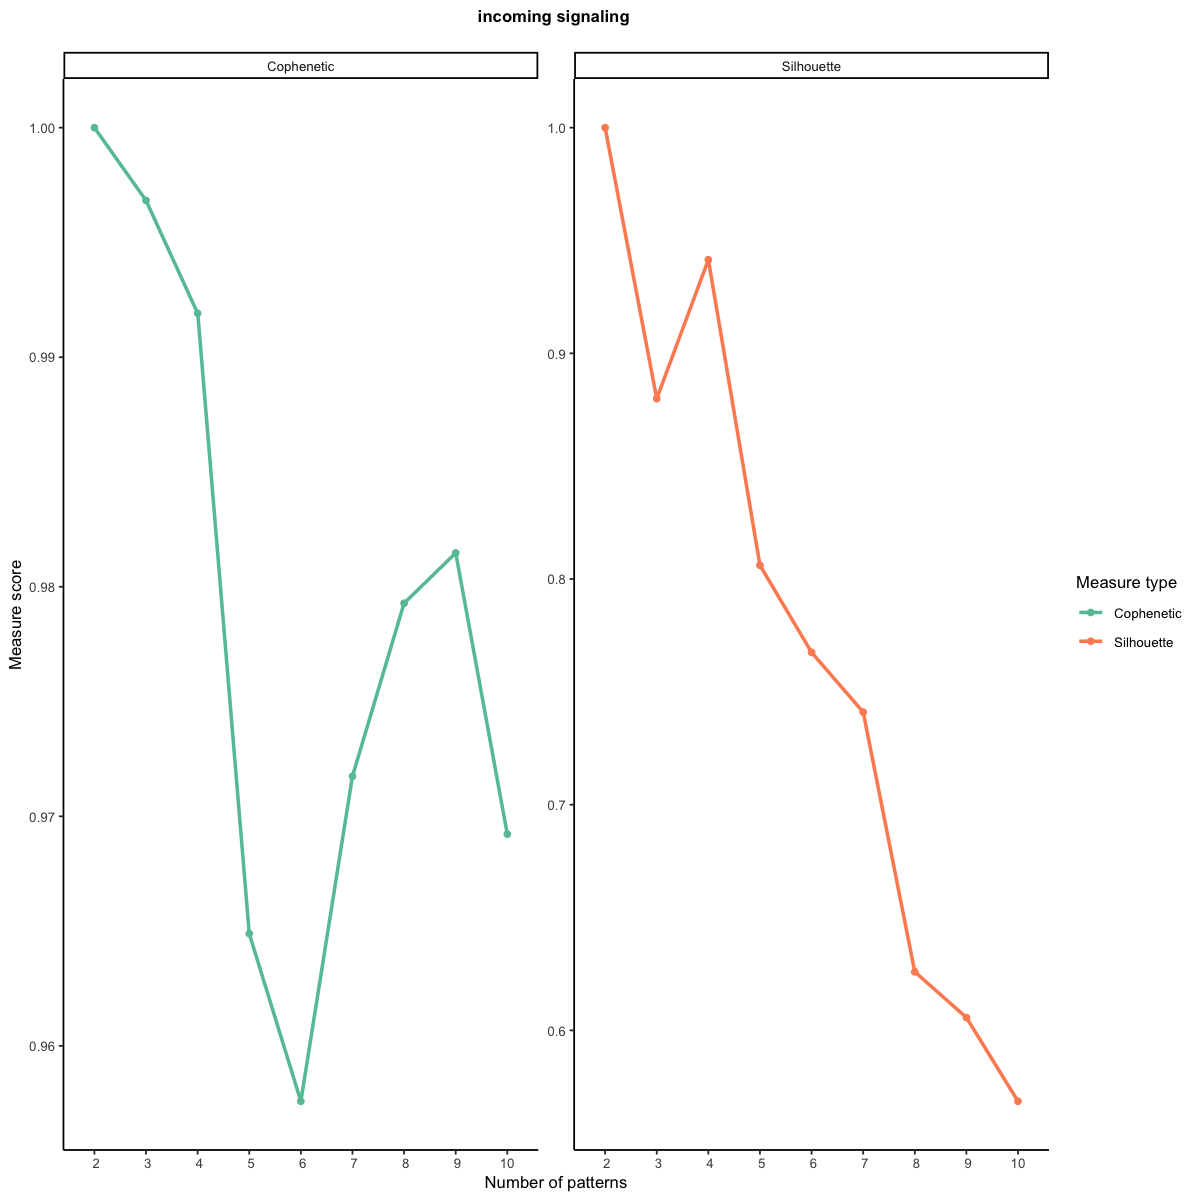

In [29]:
selectK(cellchat, pattern = "incoming")

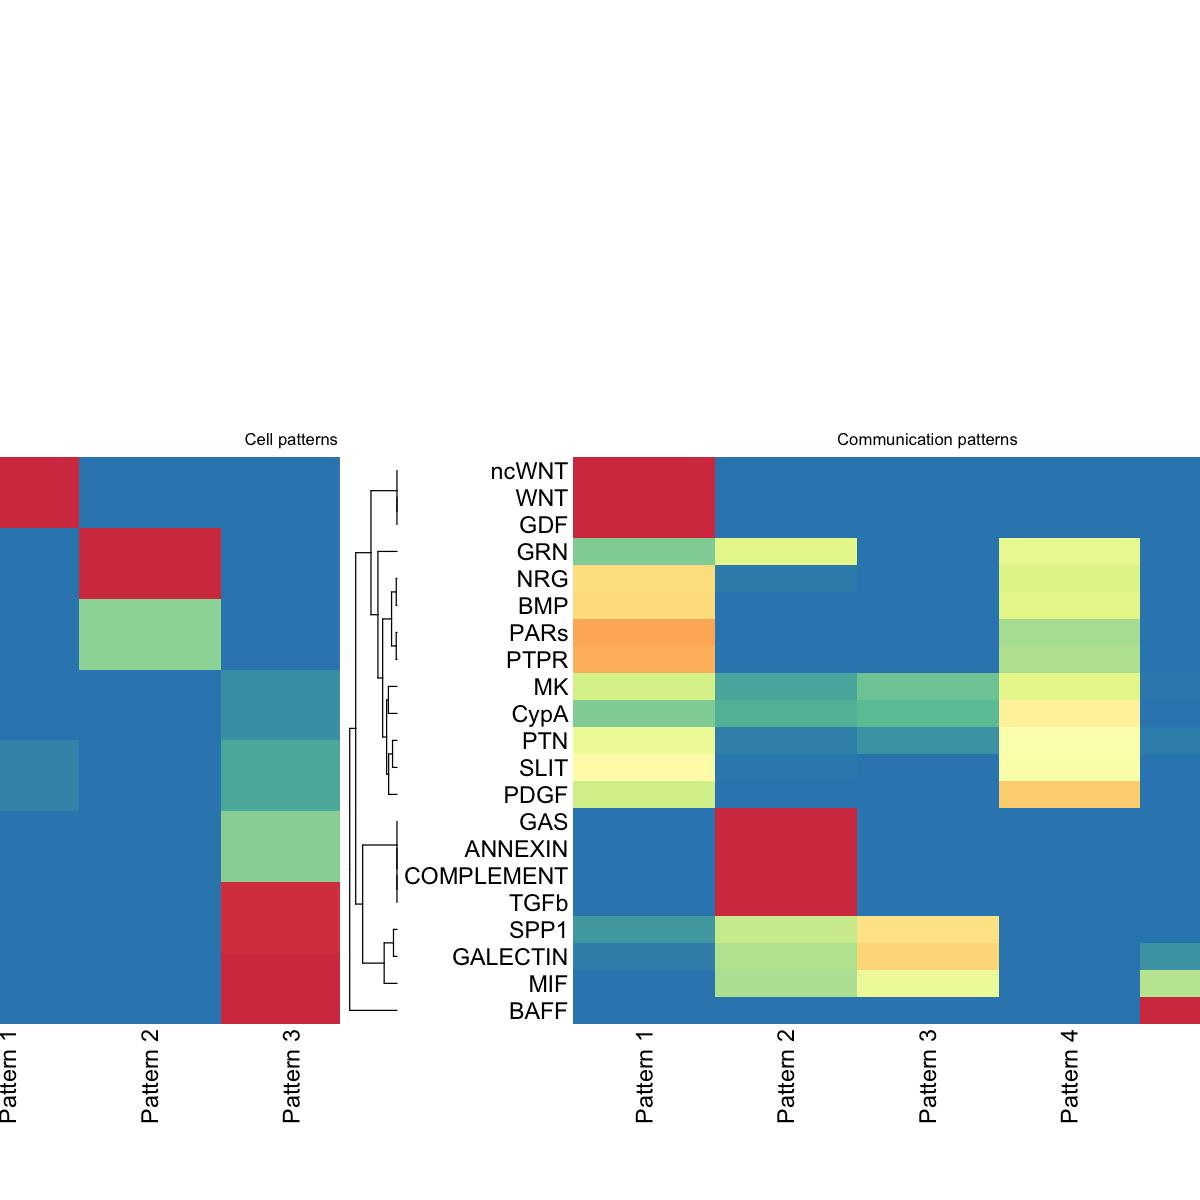

In [30]:
options(repr.plot.wdith=20, repr.plot.height=10)
nPatterns <- 5
cellchat <- identifyCommunicationPatterns(
  cellchat,
  width=15,
  height=12,
  font.size = 14,
  pattern = "incoming",
  k = nPatterns
)

Please make sure you have load `library(ggalluvial)` when running this function



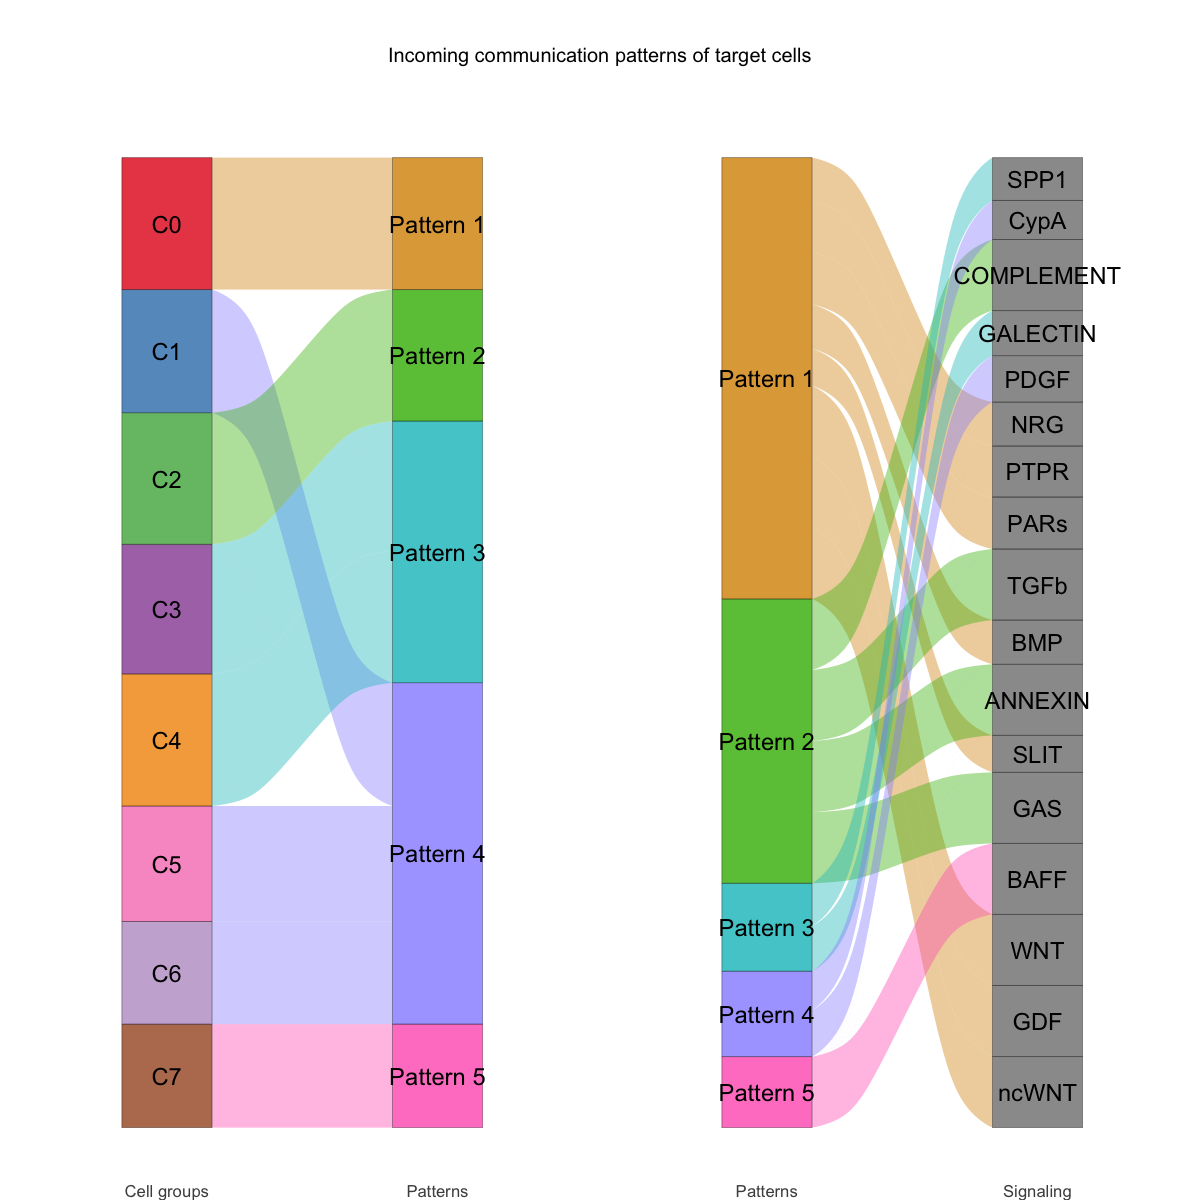

In [31]:

netAnalysis_river(cellchat, 
                pattern = "incoming",
                font.size = 5)

### Manifold and classification learning analysis of signaling networks

In [35]:
reticulate::py_install(packages = 'umap-learn')

Using virtual environment '/Users/shiwani/.virtualenvs/r-reticulate' ...


+ /Users/shiwani/.virtualenvs/r-reticulate/bin/python -m pip install --upgrade --no-user umap-learn



In [37]:

saveRDS(file = "out/cellchat_p2.rds", cellchat)

### TAM SPPI -> T cell CD44 binding
https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-024-06018-5

Comparing communications on a single object 




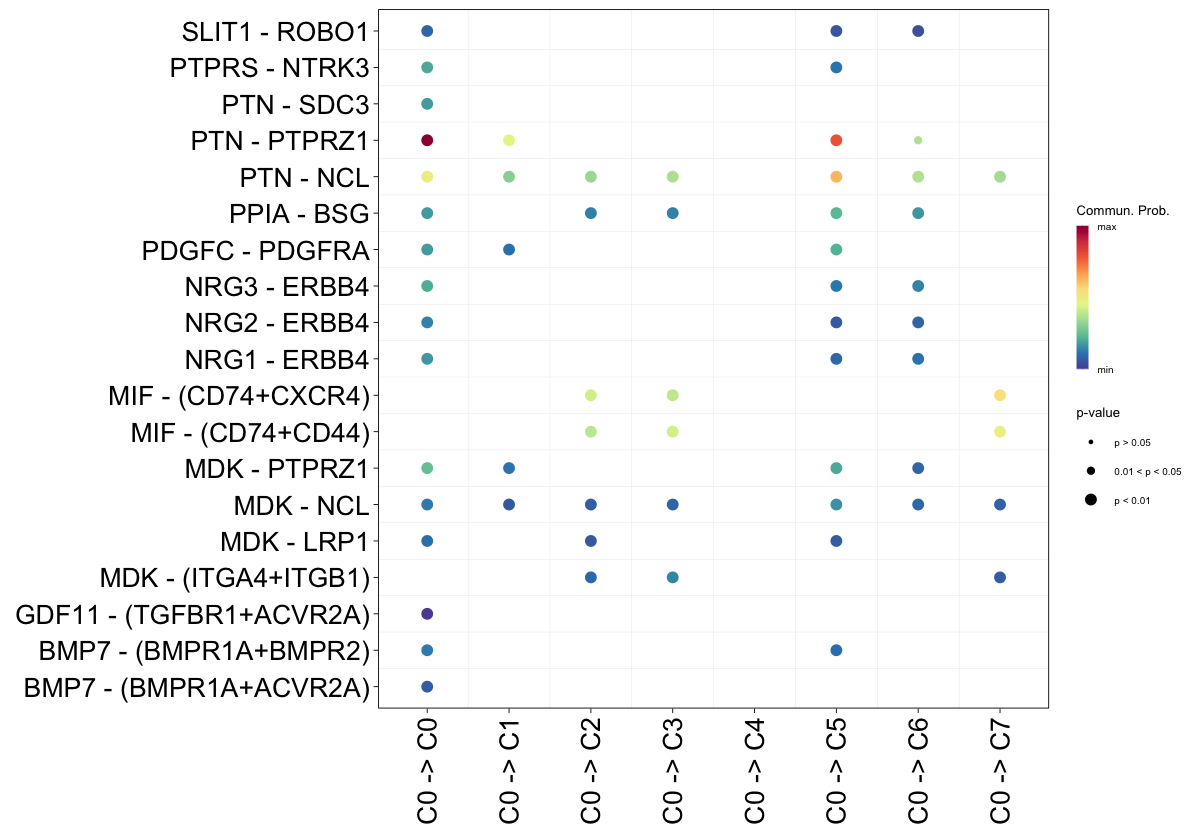

In [56]:
options(repr.plot.wdith=5, repr.plot.height=7)
netVisual_bubble(cellchat, font.size = 20, sources.use = 1, targets.use = c(1:8), remove.isolate = FALSE)

Comparing communications on a single object 




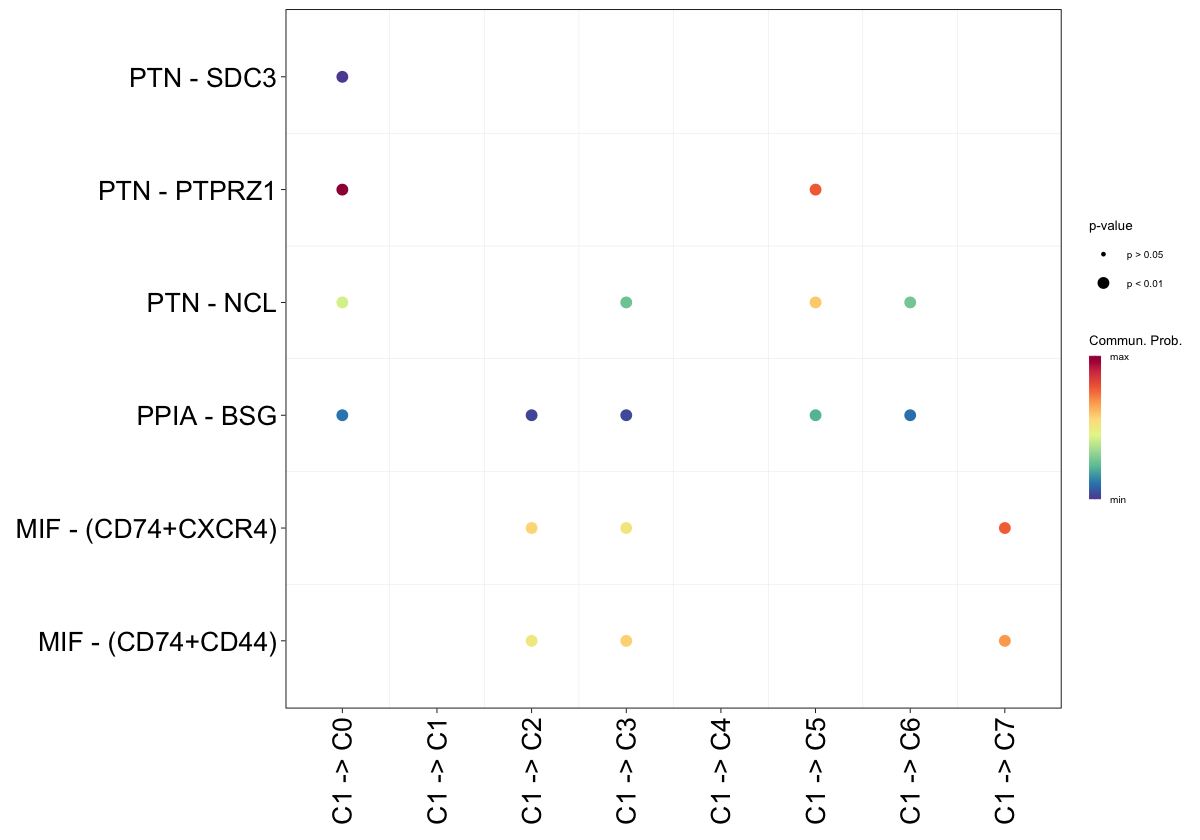

In [57]:
options(repr.plot.wdith=5, repr.plot.height=7)
netVisual_bubble(cellchat, font.size = 20, sources.use = 2, targets.use = c(1:8), remove.isolate = FALSE)

### T cell CD44 binding to TAM SPP1 can inhibit T cell CD8 activation
https://pmc.ncbi.nlm.nih.gov/articles/PMC10999581/#:~:text=The%20interaction%20of%20CD44%2DSPP1,)%20(25%E2%80%9328).

### Alos, TAM SPP1 may lead to T cell exhaustion 
https://www.sciencedirect.com/science/article/pii/S1074761324005417

Comparing communications on a single object 




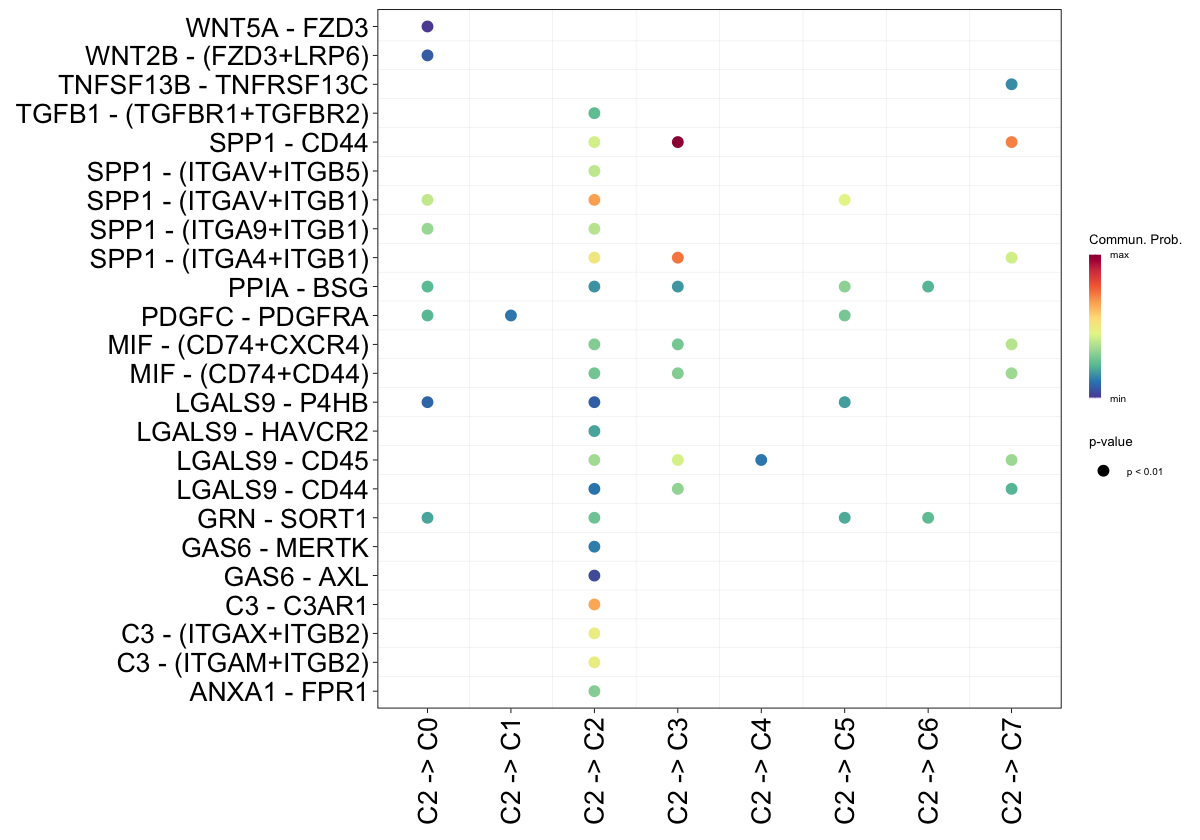

In [58]:
options(repr.plot.wdith=5, repr.plot.height=7)
netVisual_bubble(cellchat, font.size = 20, sources.use = 3, targets.use = c(1:8), remove.isolate = FALSE)

Since T cell MIF signalling helps recruit other leukocu=ytes, C7 may likely be monocytes

Comparing communications on a single object 




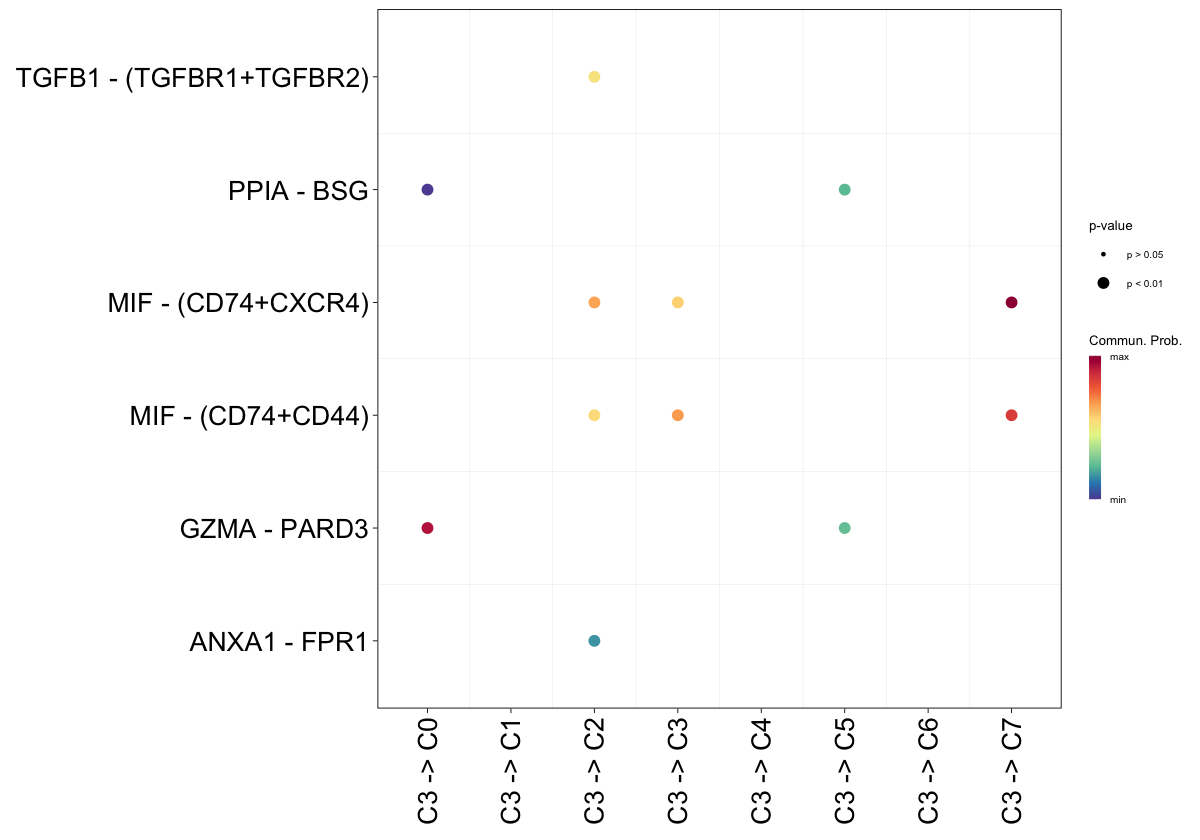

In [55]:
options(repr.plot.wdith=5, repr.plot.height=7)
netVisual_bubble(cellchat, font.size = 20, sources.use = 4, targets.use = c(1:8), remove.isolate = FALSE)